<a href="https://colab.research.google.com/github/koushik-2303A51912/-2303A51912-application-of-data-mining/blob/main/regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Ash   Acl
0  14.23  1.71
1  13.20  1.78
2  13.16  2.36
3  14.37  1.95
4  13.24  2.59


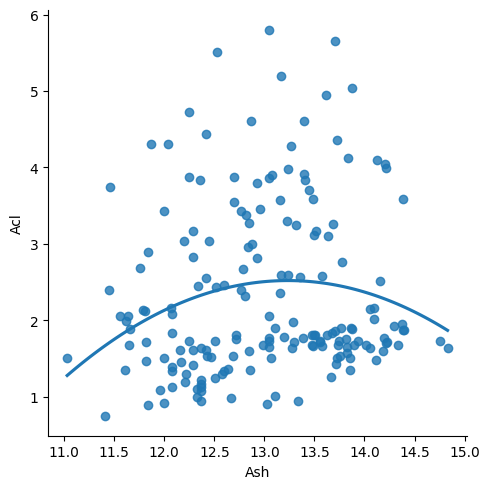

<ipython-input-3-a70598f992e9>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary.fillna(method ='ffill', inplace = True)
<ipython-input-3-a70598f992e9>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method ='ffill', inplace = True)
<ipython-input-3-a70598f992e9>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


-0.04405537315862551


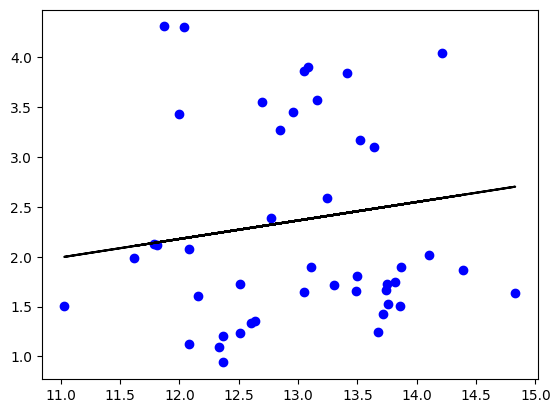

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv('/content/wine.csv')
df_binary = df[['Alcohol', 'Malic.acid']]

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Ash', 'Acl']
#display the first 5 rows
print(df_binary.head())
#plotting the Scatter plot to check relationship between Ash and Acl
sns.lmplot(x ="Ash", y ="Acl", data = df_binary, order = 2, ci = None)
plt.show()
# Eliminating NaN or missing input numbers
df_binary.fillna(method ='ffill', inplace = True)
X = np.array(df_binary['Ash']).reshape(-1, 1)
# The error was in this line. You were trying to access a column with an empty string name.
# Instead you wanted to access the 'Acl' column.
y = np.array(df_binary['Acl']).reshape(-1, 1)

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
model= LinearRegression()

model.fit(X_train, y_train)
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()
# Data scatter of predicted values

   Pclass   Age
0       3  22.0
1       1  38.0
2       3  26.0
3       1  35.0
4       3  35.0
0.08867743484257495


<ipython-input-4-19f6e272b5e3>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary.fillna(method ='ffill', inplace = True)
<ipython-input-4-19f6e272b5e3>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method ='ffill', inplace = True)
<ipython-input-4-19f6e272b5e3>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


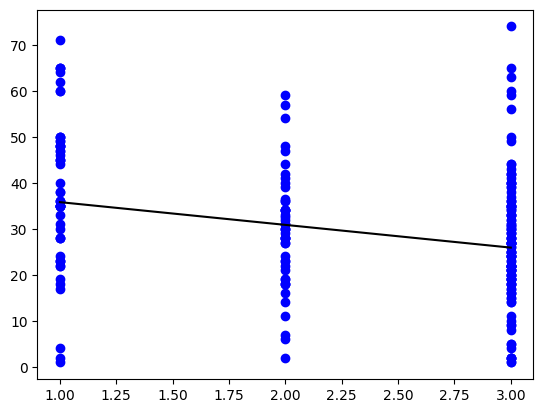

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv('/content/titanic.csv')
# Instead of using 'Name', select numerical features for prediction
df_binary = df[['Pclass', 'Age']] # Using 'Pclass' as an example

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Pclass', 'Age']  # Update column names
#display the first 5 rows
print(df_binary.head())

# Eliminating NaN or missing input numbers
df_binary.fillna(method ='ffill', inplace = True)
# Use the numerical feature 'Pclass' as the predictor
X = np.array(df_binary['Pclass']).reshape(-1, 1)

y = np.array(df_binary['Age']).reshape(-1, 1) # Using 'Age' as the target variable

# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df_binary.dropna(inplace = True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data
model= LinearRegression()

model.fit(X_train, y_train)
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)
# Scatter plot of predicted vs. actual values
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

Accuracy: 74.13%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79        87
           1       0.67      0.68      0.67        56

    accuracy                           0.74       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.74      0.74      0.74       143



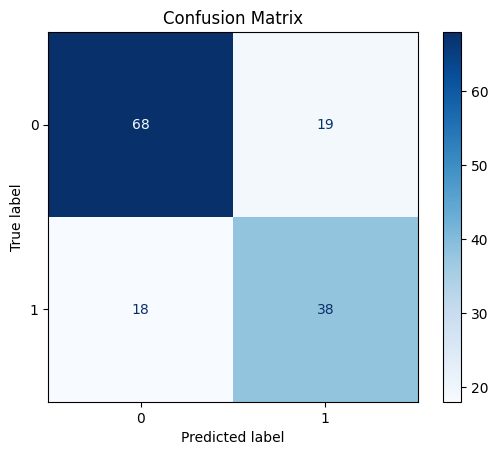

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the Titanic dataset
df = sns.load_dataset('titanic')

# Selecting only 3 relevant columns
df = df[['survived', 'pclass', 'sex', 'age']].dropna()

# Convert categorical features to numerical values
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Define features and target variable
X = df[['pclass', 'sex', 'age']]
y = df['survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Wine Dataset - Accuracy: 96.30%

Classification Report (Wine):
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54


Wine Dataset - Decision Tree Rules:
|--- color_intensity <= 3.82
|   |--- proline <= 1010.00
|   |   |--- ash <= 3.07
|   |   |   |--- class: 1
|   |   |--- ash >  3.07
|   |   |   |--- class: 0
|   |--- proline >  1010.00
|   |   |--- class: 0
|--- color_intensity >  3.82
|   |--- flavanoids <= 1.40
|   |   |--- class: 2
|   |--- flavanoids >  1.40
|   |   |--- proline <= 724.50
|   |   |   |--- alcohol <= 13.14
|   |   |   |   |--- class: 1
|   |   |   |--- alcohol >  13.14
|   |   |   |   |--- class: 0
|   |   |--- proline >  724.50
|   |   |  

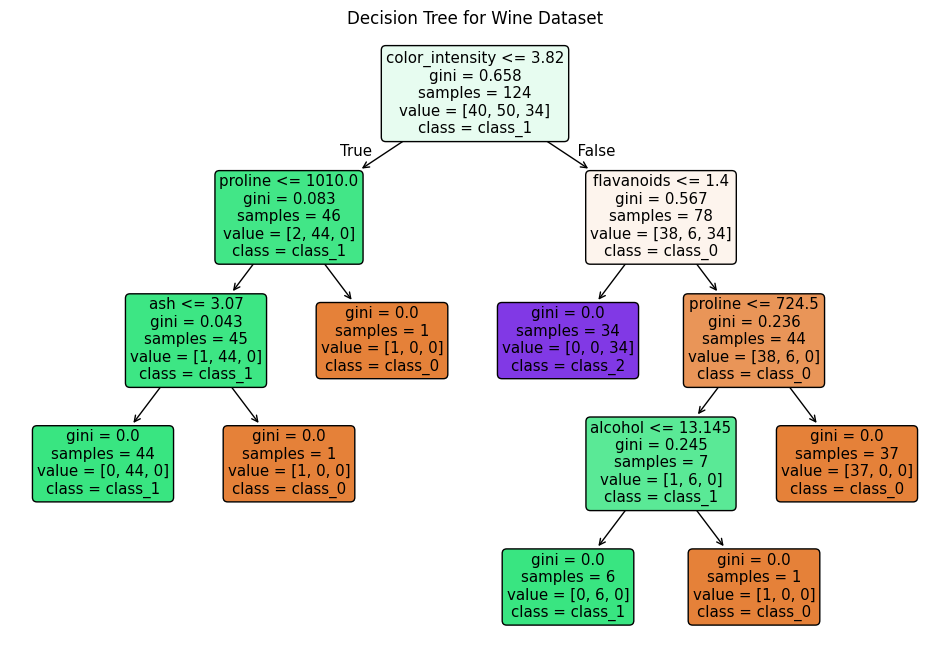

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_text
wine = load_wine()
X_wine = wine.data  # Features
y_wine = wine.target  # Labels

# Splitting the data
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42)

# Creating and training Decision Tree model
clf_wine = DecisionTreeClassifier(random_state=42)
clf_wine.fit(X_train_wine, y_train_wine)

# Predictions
y_pred_wine = clf_wine.predict(X_test_wine)

# Evaluating the model
print(f"\nWine Dataset - Accuracy: {accuracy_score(y_test_wine, y_pred_wine) * 100:.2f}%")
print("\nClassification Report (Wine):\n", classification_report(y_test_wine, y_pred_wine))

# Decision Tree rules
print("\nWine Dataset - Decision Tree Rules:")
print(export_text(clf_wine, feature_names=wine.feature_names))

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf_wine, filled=True, feature_names=wine.feature_names, class_names=[str(c) for c in wine.target_names], rounded=True)
plt.title("Decision Tree for Wine Dataset")
plt.show()

Accuracy: 68.37%

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.86      0.76       126
           1       0.68      0.44      0.53        89

    accuracy                           0.68       215
   macro avg       0.68      0.65      0.65       215
weighted avg       0.68      0.68      0.67       215


Decision Tree rules:
|--- pclass <= 2.50
|   |--- age <= 15.50
|   |   |--- pclass <= 1.50
|   |   |   |--- age <= 8.00
|   |   |   |   |--- age <= 1.46
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  1.46
|   |   |   |   |   |--- class: 0
|   |   |   |--- age >  8.00
|   |   |   |   |--- class: 1
|   |   |--- pclass >  1.50
|   |   |   |--- class: 1
|   |--- age >  15.50
|   |   |--- pclass <= 1.50
|   |   |   |--- age <= 43.50
|   |   |   |   |--- age <= 29.50
|   |   |   |   |   |--- age <= 17.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  17.50
|   |   |   |   |   |   |--- age <= 

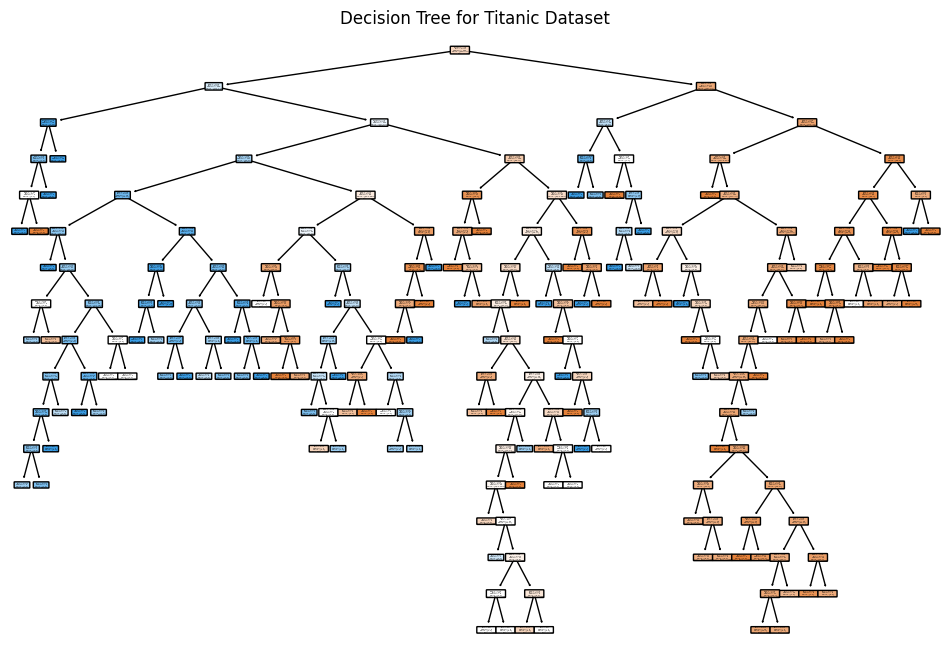

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
#from sklearn.datasets import load_wine # This import is not needed in this script
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_text

# Load the Titanic dataset using seaborn
titanic = sns.load_dataset('titanic')

# Instead of loading a dataset, select features and target from titanic DataFrame
# Ensure X and y have the same number of rows after dropping NaNs
X = titanic[['pclass', 'age']]
y = titanic['survived']

# Drop rows with missing values in either X or y
df_clean = pd.concat([X, y], axis=1).dropna()  # Concatenate X and y, then drop NaNs
X = df_clean[['pclass', 'age']].values
y = df_clean['survived'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating the Decision Tree classifier model
clf = DecisionTreeClassifier(random_state=42)

# Training the model on the training data
clf.fit(X_train, y_train)

# Making predictions on the test data
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# You can visualize the tree if needed (requires graphviz)
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
print("\nDecision Tree rules:")
#print(export_text(clf, feature_names=titanic.feature_names)) #titanic is a DataFrame and doesn't have feature_names attribute
#print(export_text(clf, feature_names=['pclass', 'age', 'sibsp', 'parch', 'fare']))
tree_rules = export_text(clf, feature_names=['pclass', 'age'])
print(tree_rules)

# Plotting the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=['pclass', 'age'], class_names=['Not Survived', 'Survived'], rounded=True) #titanic is a DataFrame and doesn't have feature_names and target_names attributes
plt.title("Decision Tree for Titanic Dataset")
plt.show()